DESCRIPTIVE ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CustomerChurn.csv')

print(df.shape)
print(df.dtypes)
print(df.head(5))

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.dropna(subset=['TotalCharges'], inplace=True)

print("\nMissing values per column:\n", df.isnull().sum())

(7043, 21)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45    

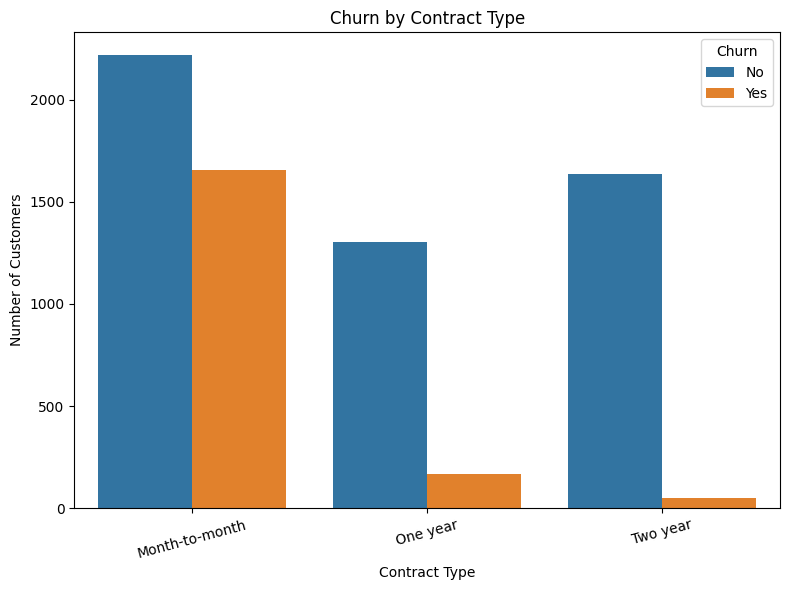


Churn distribution by contract type:
 Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887228  0.112772
Two year        0.971513  0.028487


In [34]:
df = df.copy()

#We bin 'tenure' into segments
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins = [0,12,24,48, df['tenure'].max()],
    labels = ['0-1 year', '1-2 years', '2-3 years', '4+ years']
)
#Bin MonthlyCharges into segments
df['MonthlyChargesGroup'] = pd.cut(
    df['MonthlyCharges'],
    bins = [0, 30, 60, 90, df['MonthlyCharges'].max()],
    labels = ['<$30', '$30-$60', '$60-$90', '>$90']
)

plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

churn_distribution = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn distribution by contract type:\n", churn_distribution)

PRESCRIPTIVE ANALYSIS